<a href="https://colab.research.google.com/github/cpeiret/CSC8635/blob/main/CSC8635_Machine_Learning_with_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load data
url_train = 'https://raw.githubusercontent.com/cpeiret/CSC8635/main/train.csv'
train = pd.read_csv(url_train)

url_test = 'https://raw.githubusercontent.com/cpeiret/CSC8635/main/testdata_with_groundTruth.csv'
test = pd.read_csv(url_test)

In [ ]:
train.info()
train.describe()

In [ ]:
# Plot variables
fig = plt.figure(figsize=(12,24))

plt.subplot2grid((4,2),(0,0))
train.Survived.value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((4,2),(0,1))
train.groupby("Sex")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Sex (1 = Women)")
plt.xlabel("Sex")

plt.subplot2grid((4,2),(1,0))
train.groupby("Pclass")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Class")
plt.xlabel("Class")

plt.subplot2grid((4,2),(1,1))
train.groupby("Embarked")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Embarked city")
plt.xlabel("Embarked city")

plt.subplot2grid((4,2),(2,0), colspan=2)
sns.distplot(train['Age'],kde=True)
plt.title("Age distribution")
plt.xlabel("Age")

plt.subplot2grid((4,2),(3,0))
train.groupby("SibSp")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Sibilings and Spouses on board")
plt.xlabel("Sibilings and Spouses")

plt.subplot2grid((4,2),(3,1))
train.groupby("Parch")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Parents and Children on board")
plt.xlabel("Parents and Children")

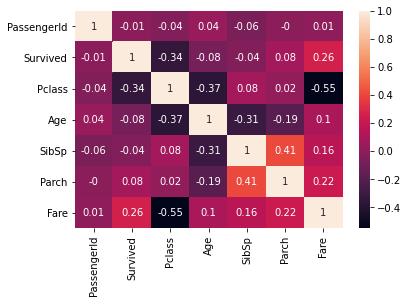

In [38]:
# Correlation matrix & heatmap
correlation_matrix = train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)